<a href="https://colab.research.google.com/github/mohd-sahil/Housing-Dataset-Analysis/blob/main/Housing_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Import and first Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science - Capstone Projects/Housing-Dataset-Analysis/housing.csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.total_rooms.value_counts()

1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: total_rooms, Length: 5926, dtype: int64

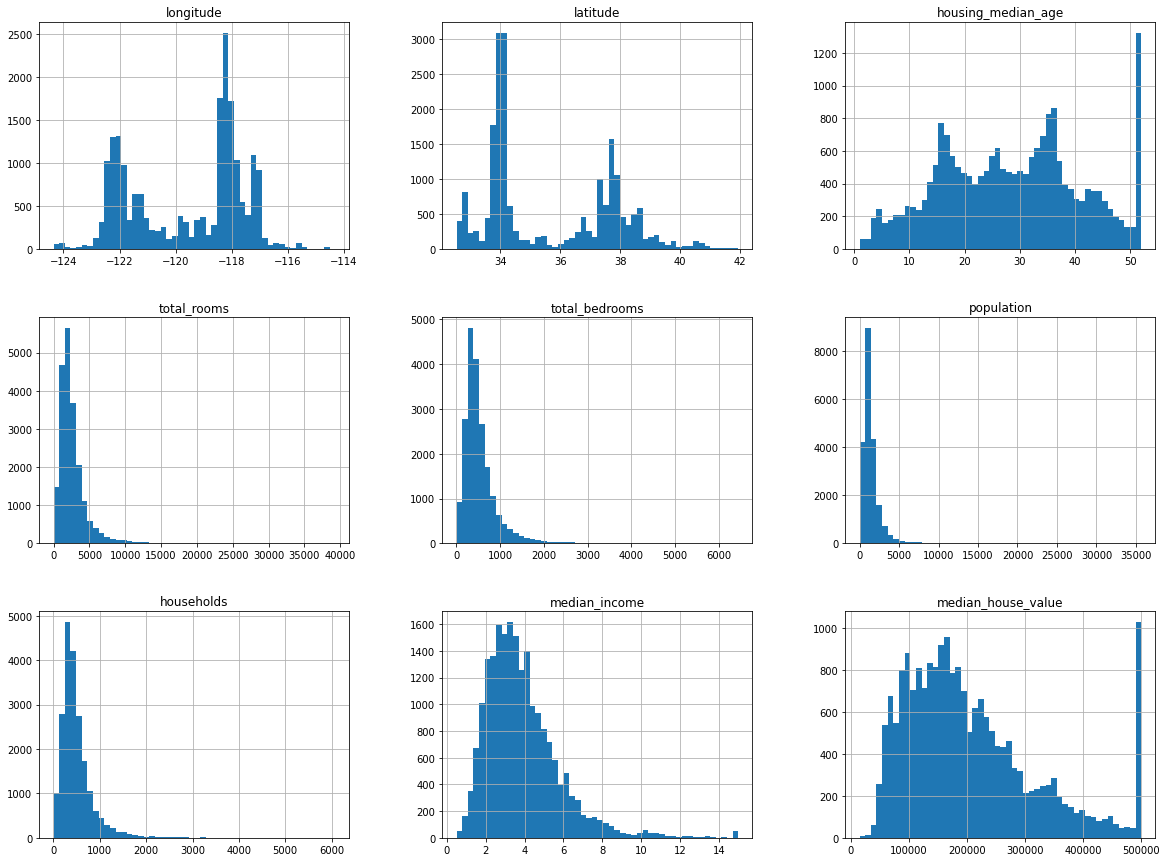

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Data Cleaning and Creating additional Features

In [13]:
df.dropna(inplace = True)

In [14]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [16]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [17]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [18]:
df.loc[[1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


In [19]:
df["pop_per_household"] = df.population.div(df.households)

In [20]:
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)

In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## Which Factors influence House Prices?

In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


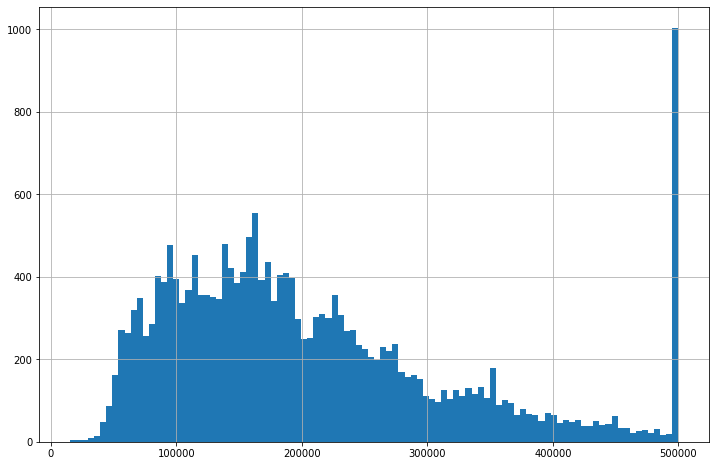

In [23]:
df.median_house_value.hist(bins = 100, figsize = (12, 8))
plt.show()

In [24]:
df.corr().median_house_value.sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

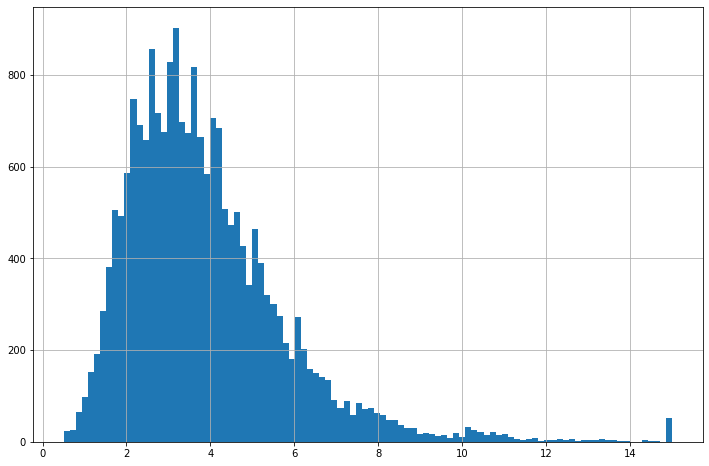

In [25]:
df.median_income.hist(bins = 100, figsize = (12, 8))
plt.show()

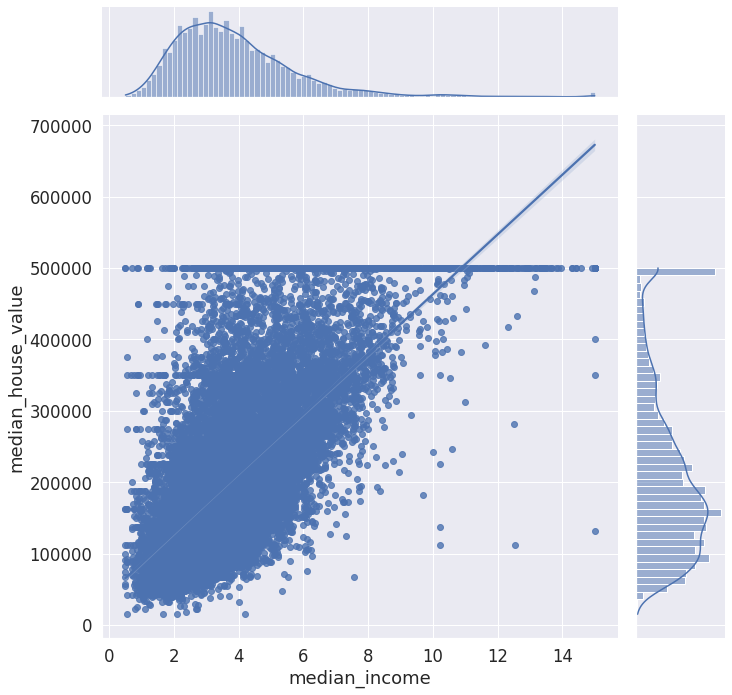

In [26]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", height = 10)
plt.show()

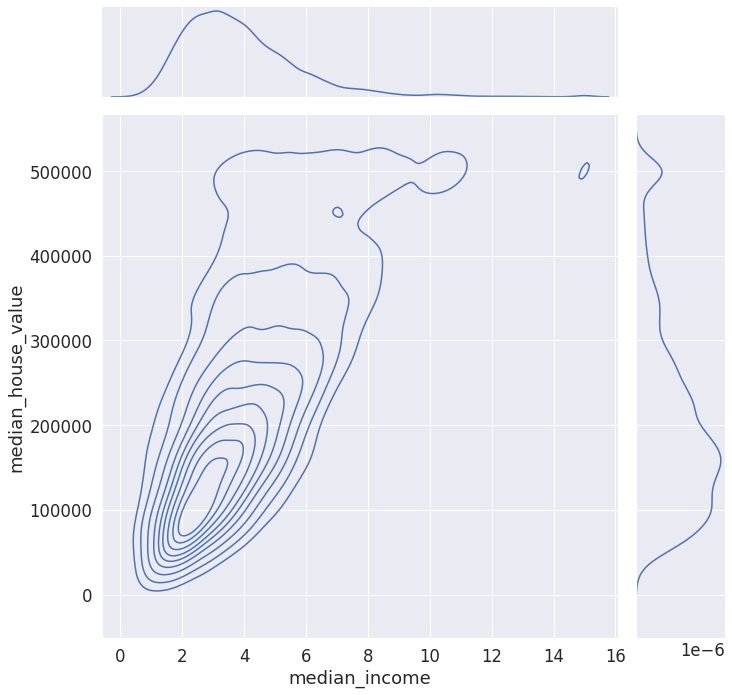

In [27]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", height = 10)
plt.show()

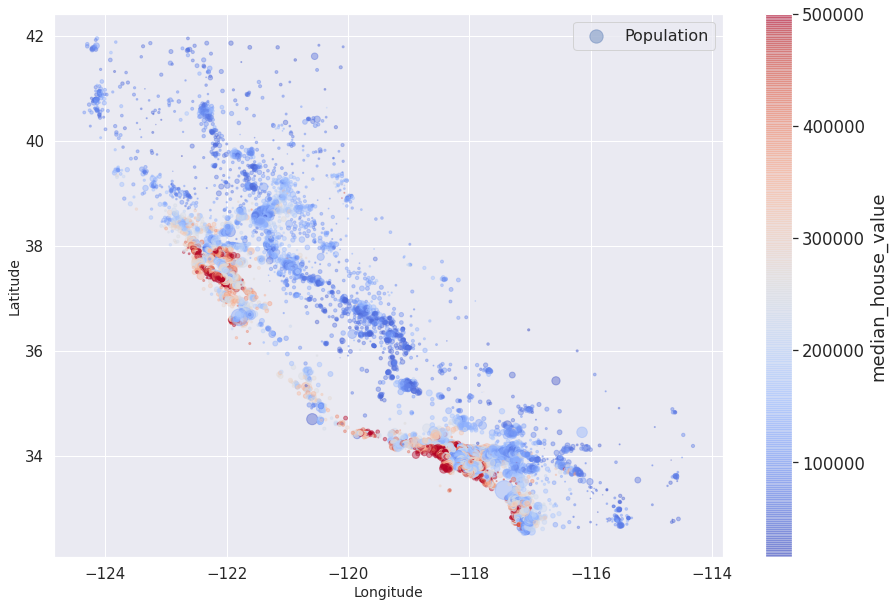

In [28]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()